Generated Heights: [ 47  33  99   8  54  71  86  96  84 100  93  64  74  43  64  87  18   8
   3   6]
Max Lake Depth: 91


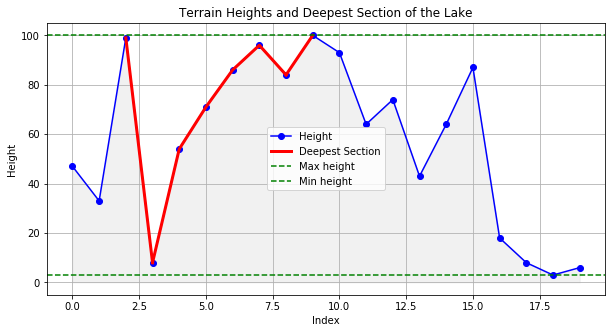

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sequence():
    return np.random.randint(1, 101, size=20)

def find_deepest_lake(heights):
    heights = np.array(heights)
    
    left_max = np.maximum.accumulate(heights)
    right_max = np.maximum.accumulate(heights[::-1])[::-1] 
    
    water = np.minimum(left_max, right_max) - heights
    max_depth = np.max(water)
    
    if max_depth > 0:
        lake_indices = np.where(water == max_depth)[0]
        
        start, end = lake_indices[0], lake_indices[-1]
        while start > 0 and water[start - 1] > 0:
            start -= 1
        while end < len(water) - 1 and water[end + 1] > 0:
            end += 1
        lake_indices = np.arange(start, end + 1)
    else:
        lake_indices = np.array([])
    
    return max_depth, lake_indices, water

def plot_sequence(heights, lake_indices):
    x = np.arange(len(heights))
    plt.figure(figsize=(10, 5))
    
    plt.plot(x, heights, marker='o', linestyle='-', color='blue', label='Height')
    plt.fill_between(x, heights, color='lightgray', alpha=0.3)
    
    if lake_indices.size > 0:
        plt.plot(x[lake_indices], heights[lake_indices], color='red', linewidth=3, label='Deepest Section')
        
        if lake_indices[0] > 0:
            plt.plot([lake_indices[0] - 1, lake_indices[0]], 
                     [heights[lake_indices[0] - 1], heights[lake_indices[0]]], color='red', linewidth=3)
        if lake_indices[-1] < len(heights) - 1:
            plt.plot([lake_indices[-1], lake_indices[-1] + 1], 
                     [heights[lake_indices[-1]], heights[lake_indices[-1] + 1]], color='red', linewidth=3)
    
    plt.axhline(y=np.max(heights), color='green', linestyle='--', label='Max height')
    plt.axhline(y=np.min(heights), color='green', linestyle='--', label='Min height')
    
    plt.xlabel('Index')
    plt.ylabel('Height')
    plt.title('Terrain Heights and Deepest Section of the Lake')
    plt.legend()
    plt.grid(True)
    plt.show()

heights = generate_sequence()
print("Generated Heights:", heights)

depth, lake_indices, water = find_deepest_lake(heights)
print("Max Lake Depth:", depth)

plot_sequence(heights, lake_indices)
